In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=16)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from sklearn import metrics

In [4]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df['attrition']
X = df.drop(columns=['attrition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [5]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


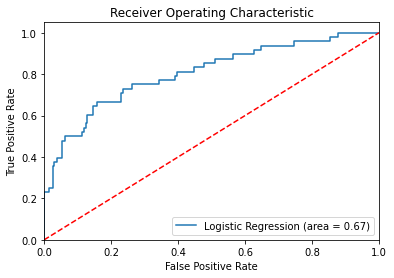

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred).ravel()
print(confusion_matrix)
# from documentation: tn, fp, fn, tp

[305  15  29  19]


In [8]:
assumed_top_10 = ['age', 'job_satisfaction', 'monthly_income', 'over_time', 'work_life_balance', 'years_since_last_promotion', 
                  'marital_status_single', 'department_sales', 'num_companies_worked', 'job_involvement']

In [9]:
len(assumed_top_10)

10

In [10]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.4463504 ,  2.28090588, -0.16239918, ..., -0.31409347,
        -0.91892141,  1.45864991],
       [ 1.32236521, -0.4384223 ,  1.71733935, ..., -0.31409347,
         1.08823234, -0.68556546],
       [ 0.008343  ,  2.28090588, -0.16239918, ..., -0.31409347,
        -0.91892141,  1.45864991],
       ...,
       [-1.08667552, -0.4384223 , -0.16239918, ..., -0.31409347,
         1.08823234, -0.68556546],
       [ 1.32236521, -0.4384223 ,  1.71733935, ..., -0.31409347,
         1.08823234, -0.68556546],
       [-0.32016256, -0.4384223 , -0.16239918, ..., -0.31409347,
         1.08823234, -0.68556546]])

In [11]:
y = df['attrition']
X = df[assumed_top_10].values

In [12]:
X.shape

(1470, 10)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=4000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=4000)

In [14]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [38]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred).ravel()
print(con_matrix)
# from documentation: tn, fp, fn, tp

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [16]:
lasso_coeffs = ['daily_rate', 'monthly_income', 'job_satisfaction', 'business_travel', 'years_at_company', 'age']

In [17]:
df = pd.read_csv("./data/clean_one_hot_data.csv")
df.drop(df.columns[0], axis=1,inplace=True)

y = df['attrition']
X = df[lasso_coeffs]

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
logreg = LogisticRegression(max_iter=150)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=150)

In [18]:
y_pred = logreg.predict_proba(X_test)
print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.86957


In [20]:
cm = confusion_matrix(y_test, y_pred).ravel()
print(cm)
# from documentation: tn, fp, fn, tp

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [21]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [22]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [1]:
# print(y_pred)

In [25]:
threshold = 0.3
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

df1 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [27]:
df1

,0
accuracy,0.858696
recall,0.229167
precision,0.423077
roc_auc_score,0.591146


In [28]:
threshold = 0.35
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df2 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [29]:
df2

,0
accuracy,0.87500
recall,0.12500
precision,0.60000
roc_auc_score,0.55625


In [30]:
threshold = 0.25
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df3 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [31]:
df3

,0
accuracy,0.817935
recall,0.375000
precision,0.327273
roc_auc_score,0.629688


In [32]:
threshold = 0.20
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df4 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [33]:
df4

,0
accuracy,0.733696
recall,0.583333
precision,0.264151
roc_auc_score,0.669792


In [34]:
threshold = 0.15
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df5 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [35]:
df5

,0
accuracy,0.543478
recall,0.750000
precision,0.187500
roc_auc_score,0.631250


In [36]:
threshold = 0.10
preds = np.where(logreg.predict_proba(X_test)[:,1] > threshold, 1, 0)

df6 = pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                   precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
             index=["accuracy", "recall", "precision", "roc_auc_score"])

In [37]:
df6

,0
accuracy,0.385870
recall,0.854167
precision,0.157692
roc_auc_score,0.584896
